# M.A.D. Python Libraries - `seaborn`

<span style="color:red;">**M.A.D.** => **M**achine **L**earning and **D**ata Science<span>

**Purpose:** The purpose of this workbook is to help you get comfortable with the topics outlined below.

**Prereqs:**
* Pandas Workbook or a good grasp of data manipulation techniques using pandas
    
*Checkout the Python Libraries for Data Manipulation Workbook for a numpy and pandas review.*
    
**Recomended Usage**
* Run each of the cells (Shift+Enter) and edit them as necessary to solidify your understanding
* Do any of the exercises that are relevant to helping you understand the material

**Topics Covered**
* Seaborn

# Workbook Setup

## Troubleshooting Tips

If you run into issues running any of the code in this notebook, check your version of Jupyter, extensions, etc.

```bash
!jupyter --version

jupyter core     : 4.6.1
jupyter-notebook : 6.0.2
qtconsole        : not installed
ipython          : 7.9.0
ipykernel        : 5.1.3
jupyter client   : 5.3.4
jupyter lab      : 1.2.3
nbconvert        : 5.6.1
ipywidgets       : not installed
nbformat         : 4.4.0
traitlets        : 4.3.3
```

```bash
!jupyter-labextension list

JupyterLab v1.2.3
Known labextensions:
   app dir: /usr/local/share/jupyter/lab
        @aquirdturtle/collapsible_headings v0.5.0  enabled  OK
        @jupyter-widgets/jupyterlab-manager v1.1.0  enabled  OK
        @jupyterlab/git v0.8.2  enabled  OK
        @jupyterlab/github v1.0.1  enabled  OK
        jupyterlab-flake8 v0.4.0  enabled  OK

Uninstalled core extensions:
    @jupyterlab/github
    jupyterlab-flake8
```

In [1]:
# Run this cell to check the version of Jupyter you are running
#!jupyter --version

In [2]:
# Run one of these cells to check what extensions you are using
#!jupyter-labextension list
#!jupyter-nbextension list

## Notebook Configs

In [1]:
# AUTO GENERATED CELL FOR NOTEBOOK SETUP

# NOTEBOOK WIDE MAGICS

# Reload all modules before executing a new line
%load_ext autoreload
%autoreload 2

# Abide by PEP8 code style
%load_ext pycodestyle_magic
%pycodestyle_on

# LIBRARY SPECIFIC MAGICS - UNCOMMENT AS NEEDED

# Plot all matplotlib plots in output cell and save on close
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
np.set_printoptions(threshold=5)

In [4]:
sns.set(style="darkgrid")

In [5]:
matplotlib.__version__

'3.1.1'

# [`seaborn`](https://seaborn.pydata.org/)

`seaborn` is a data visualization library based on matplotlib that allows you to make prettier and more complex graphics. Particularly useful when working with pandas data structures.

Checkout this link for more examples: [Official Seaborn Examples Gallery](https://seaborn.pydata.org/examples/index.html)

## Datasets

We will start by loading a few different datasets then go through examples of how we can use seaborn to visualize that is going on with our data.

Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrames. In order to visualize data from a Pandas DataFrame, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.

In [142]:
# Checkout available datasets we can play with
dataset_names = sns.get_dataset_names()
dataset_names

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [144]:
# Load the "brainnetworks" dataframe
brain_networks = sns.load_dataset("brain_networks")
brain_networks

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,915,-7.4295125007629395,-4.81321907043457,-3.670536518096924,1.4422610998153689,-19.6804313659668,-29.109355926513672,-3.3765623569488525,-8.764892578125,0.017911728471517563,...,58.28579330444336,68.55741119384766,22.83304786682129,76.17948913574219,51.9346694946289,-6.614512920379639,-6.690762042999268,22.893030166625977,48.27437973022461,76.22845458984375
919,916,-33.55413818359375,-38.60562133789063,-25.66480255126953,-30.252351760864254,5.5627851486206055,20.182186126708984,17.91124725341797,24.65358161926269,-32.93561172485352,...,59.86481857299805,23.00457763671875,7.6574625968933105,50.96239852905274,13.696922302246096,63.50361633300781,57.40117645263672,24.97454833984375,51.97215270996094,64.53878784179689
920,917,-78.53956604003906,-74.19718933105469,-54.04159545898438,-39.97029113769531,-14.277058601379395,-30.606460571289066,60.62852096557617,62.02702331542969,-32.80055618286133,...,68.76786804199219,49.66401672363281,64.55149841308594,43.80074691772461,8.144479751586914,47.28145980834961,70.49964904785156,66.99440002441406,81.53924560546875,64.96977233886719
921,918,-103.23582458496094,-98.7442855834961,-40.10954284667969,-44.90773391723633,12.109148025512695,1.6213401556015017,33.765560150146484,55.35607147216797,-14.330512046813965,...,103.1552505493164,106.45484924316406,9.04682731628418,46.67441940307617,40.95479583740234,0.8771800398826599,37.57715225219727,20.517745971679688,3.124434232711792,56.71838760375977


In [235]:
# Load the "planets" dataframe
planets = sns.load_dataset("planets")
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [146]:
# Load the "tips" dataframe
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [254]:
# Load the "diamonds" dataframe
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [273]:
# Load the "titanic" dataframe
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [152]:
time_val_df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
time_val_df

,time,value
0,0,1.303886
1,1,2.946102
2,2,4.916797
3,3,5.515185
4,4,6.991406
...,...,...
495,495,44.428563
496,496,44.623669
497,497,44.878927
498,498,44.357723


In [153]:
x = np.random.normal(size=100)
print(type(x))
x

<class 'numpy.ndarray'>


array([-2.67679502, -0.59042467,  0.25240492, ...,  0.95503513,
        0.45854275, -1.81333405])

## Exploring the planets dataset (categorical data)

Let's start by reminding ourselves what our dataset looks like. Use pandas dataframe `head()` function to see the first check of our data.

In [238]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [251]:
planets.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [253]:
planets.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', ...,
       'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations'],
      dtype=object)

Before graphinguniqueetimes it helps to take a look at a statistical summary of the data. Luckily pandas provides an easy way for us to do this.

In [158]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


Show all pairwise relationships in dataset using `pairplot`

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


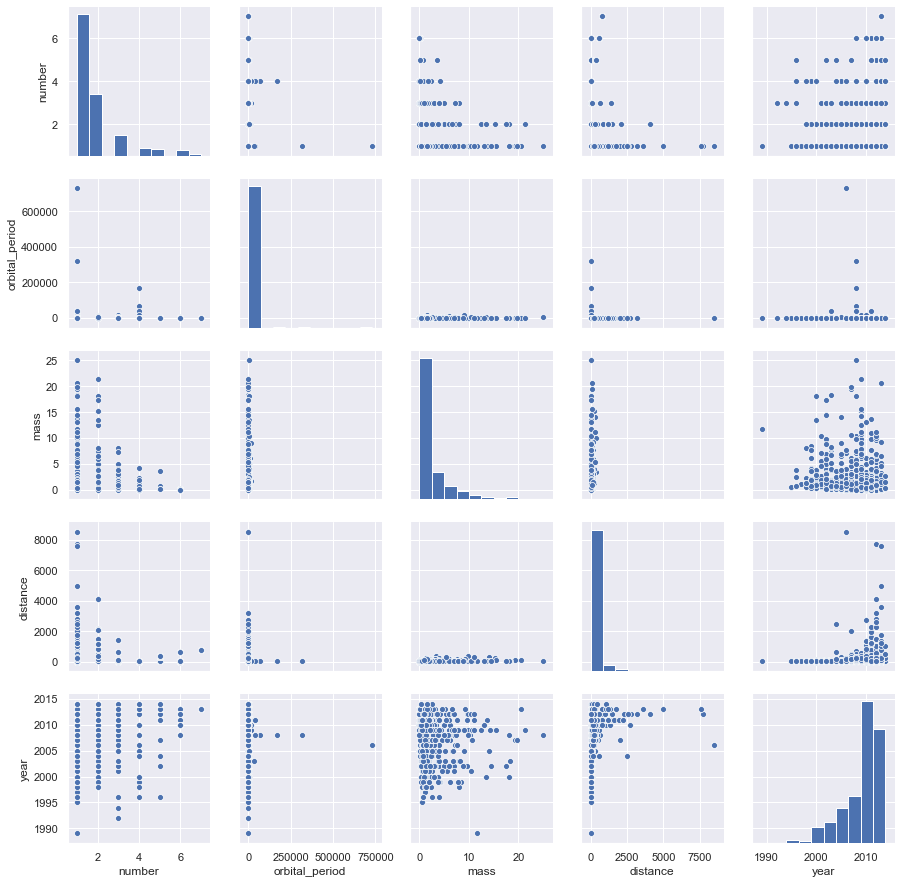

In [156]:
sns.pairplot(planets)

Then we can inspect and customize anything interesting that we see above.

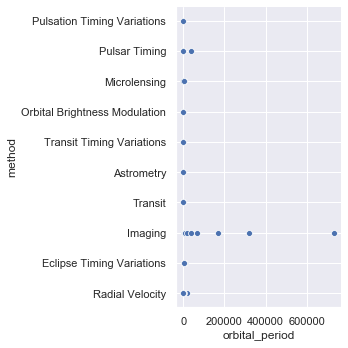

In [248]:
sns.relplot(x='orbital_period', y='method', data=planets)

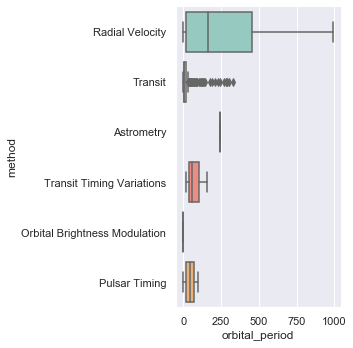

1:80: E501 line too long (116 > 79 characters)


In [267]:
sns.catplot(x="orbital_period", y="method", data=planets[planets.orbital_period < 1000], kind='box', palette="Set3")

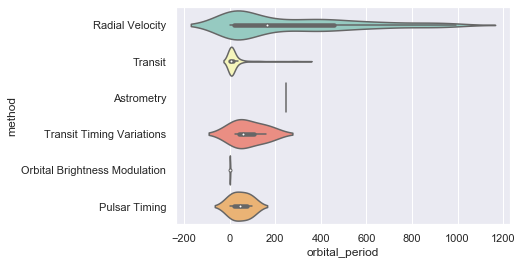

1:80: E501 line too long (127 > 79 characters)


In [244]:
sns.violinplot(x="orbital_period", y="method", data=planets[planets.orbital_period < 1000], scale="width", palette="Set3")

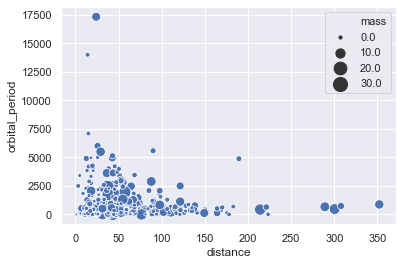

3:1: E128 continuation line under-indented for visual indent


In [249]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="distance", y="orbital_period",
                     hue="year", size="mass",
                     palette=cmap, sizes=(10, 200),
                     data=planets)

## Exploring the diamonds dataset

In [255]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [256]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [262]:
print('Unique Cuts: {}'.format(diamonds.cut.unique()))
print('Unique Colors: {}'.format(diamonds.color.unique()))
print('Unique Clarities: {}'.format(diamonds.clarity.unique()))

Unique Cuts: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique Colors: ['E' 'I' 'J' ... 'F' 'G' 'D']
Unique Clarities: ['SI2' 'SI1' 'VS1' ... 'VVS1' 'I1' 'IF']


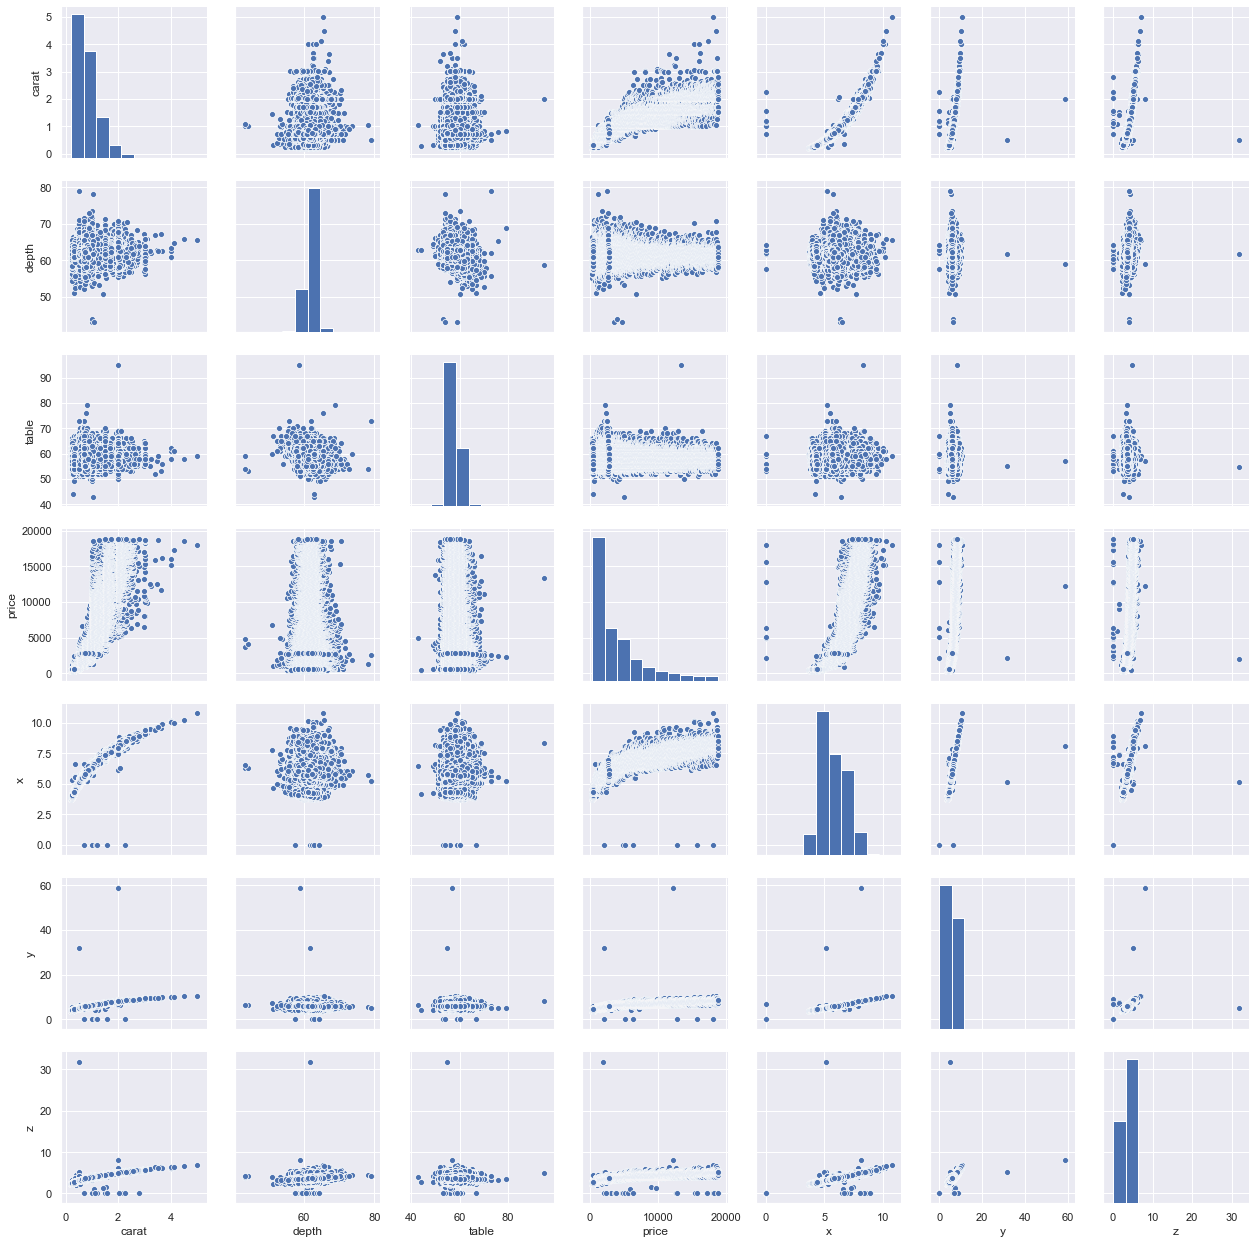

In [164]:
sns.pairplot(diamonds)

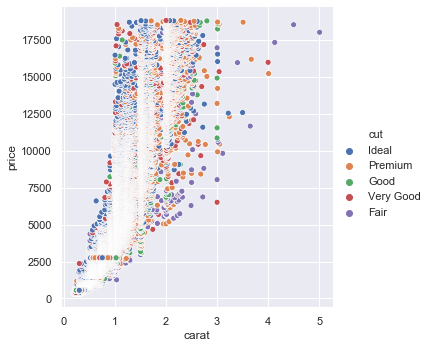

In [264]:
sns.relplot(x="carat", y="price", hue="cut", data=diamonds)

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

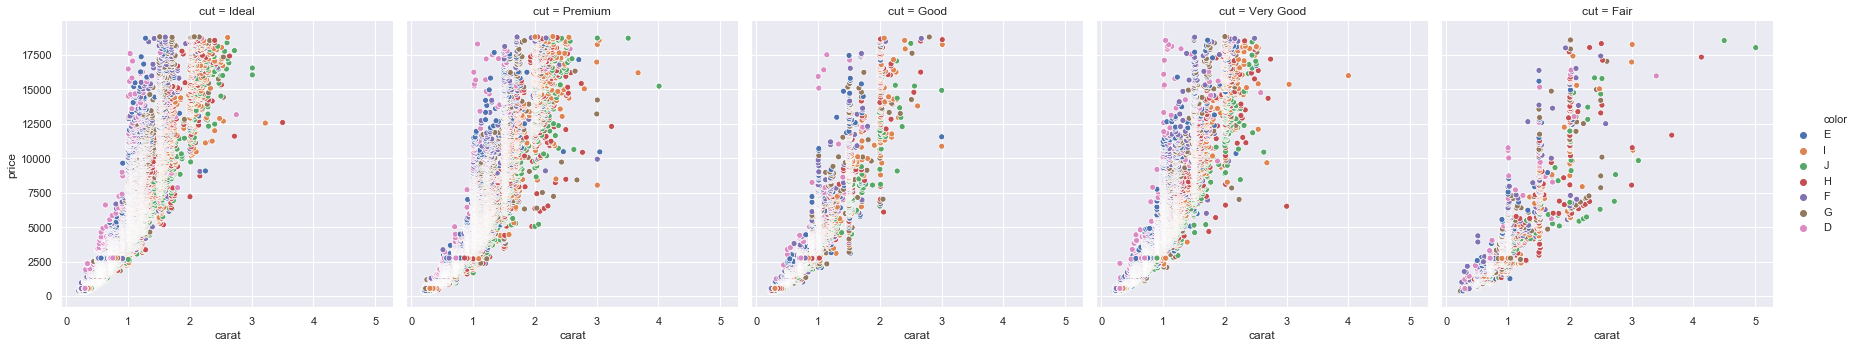

1:73: E703 statement ends with a semicolon


In [265]:
sns.relplot(x="carat", y="price", hue="color", col="cut", data=diamonds)

Plotting Categorical Data `catplot`

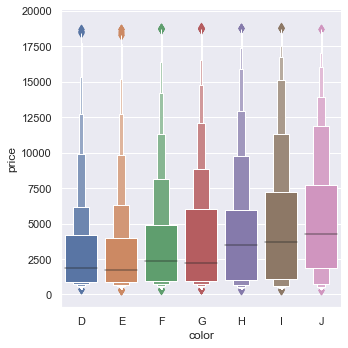

1:80: E501 line too long (83 > 79 characters)


In [271]:
sns.catplot(x="color", y="price", kind="boxen", data=diamonds.sort_values("color"))

Voilin plots

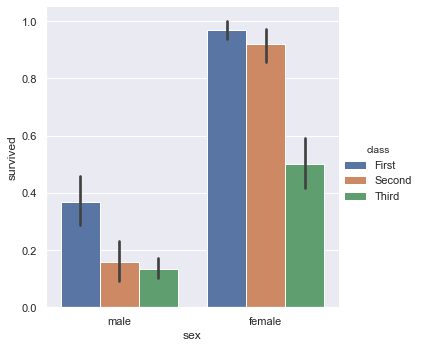

In [274]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

### Line plots

In [278]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

In [279]:
df.head()

,time,value
0,0,1.450013
1,1,2.028635
2,2,1.928571
3,3,2.231959
4,4,2.967501


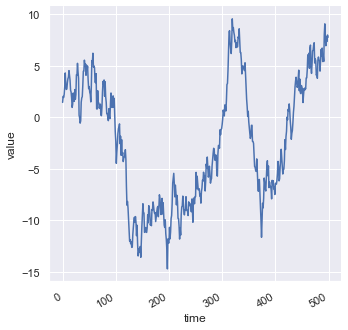

In [280]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

Line plot with error margin

In [105]:
fmri = sns.load_dataset("fmri")

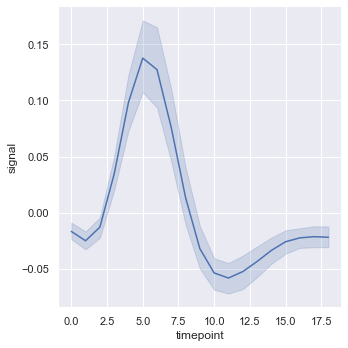

In [106]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);
# sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri); # no ci
# sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri); # stddev ci

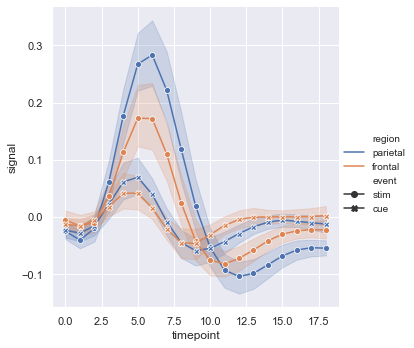

In [107]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

## Visualizing Data Distrubution

We will be working with two dataset. Familiarize yourself with them, then run the the various examples of how we can visualize the distribution of each dataset graphically.

In [113]:
x = np.random.normal(size=100)

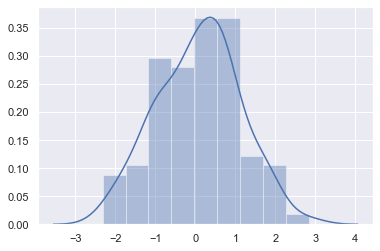

In [114]:
sns.distplot(x)

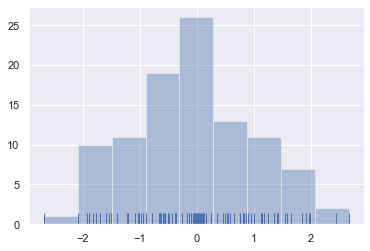

In [168]:
sns.distplot(x, kde=False, rug=True);

In [231]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

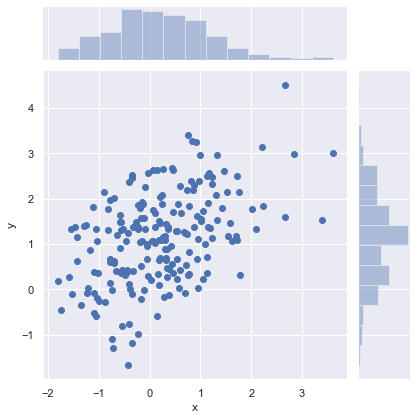

In [233]:
sns.jointplot(x="x", y="y", data=df)